In [1]:
import pandas as pd
%store -r xgb_data_risk

In [2]:
print(xgb_data_risk['EXT_SCORE_category'])

0         0
1         1
2         1
3         1
4         0
         ..
291052    1
291053    0
291054    1
291055    1
291056    1
Name: EXT_SCORE_category, Length: 291057, dtype: int64


In [ ]:
print(xgb_data_risk['EXT_SCORE_category'])
import xgboost as xgb
import numpy as np

# Custom objective function
def custom_objective(y_true, y_pred):
    # Gradient: Partial derivative of the loss function with respect to predictions
    grad = -2 * (y_true - y_pred)

    # Hessian: Second derivative of the loss function with respect to predictions
    hess = 2 * np.ones_like(y_pred)

    # Lambda value for regularization
    lambda_val = 1.0  # Set this to the value you need

    # Calculate the additional term for favored and penalized categories
    favored_term = np.mean(y_pred[y_true == 1])  # Where EXT_Score_category is 1
    penalized_term = np.mean(y_pred[y_true == 0])  # Where EXT_Score_category is 0
    additional_term = lambda_val * (favored_term - penalized_term)

    # Adjust gradient with the additional term
    grad_adjustment = lambda_val * (1 if y_true == 1 else -1)
    grad += grad_adjustment

    return grad, hess

# Assuming you have a DataFrame `df` with your features and a target column 'target'
# Split data into features and target
X = xgb_data_risk.drop(['TARGET'], axis=1)
y = xgb_data_risk['TARGET']

# Create the DMatrix objects required by XGBoost
dtrain = xgb.DMatrix(X, label=y)

# Define parameters for the XGBoost model
params = {
    'max_depth': 3,
    'eta': 0.1,
    'silent': 1
}

# Train the model with the custom objective
model = xgb.train(params, dtrain, obj=custom_objective)


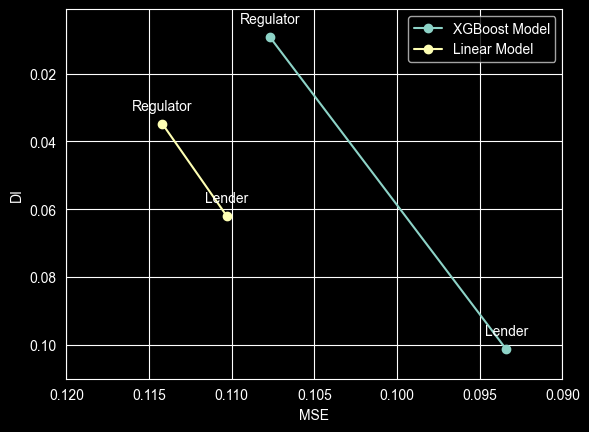

In [68]:

import seaborn as sns
import matplotlib.pyplot as plt
MSE_xb=[0.1077, 0.0934 ]
DI_xb=[0.0092, 0.1013]

reg_lin=[0.1142, 0.1103]
len_lin=[0.0348, 0.0620]
plt.style.use('dark_background')

# Plot the MSE values for different l values
plt.plot(MSE_xb, DI_xb, marker='o', label="XGBoost Model")
anno_lin = ["Regulator", "Lender"]

#convex
#plt.xlim(max(reg_lin), min(reg_lin))
#print(max(MSE_xb))
#plt.ylim(max(DI_xb), min(len_lin))
anno_lin=["Regulator", "Lender"]
for i, txt in enumerate(anno_lin):
    plt.annotate(txt, (MSE_xb[i], DI_xb[i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(anno_lin):
    plt.annotate(txt, (reg_lin[i], len_lin[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(reg_lin, len_lin, marker='o', label="Linear Model")
plt.xlim(0.120, 0.09)
plt.ylim(0.11, 0.001)
plt.xlabel('MSE')
plt.ylabel('DI')
#plt.title('MSE of Linear Regression Model for Different l Values')
plt.legend()
plt.savefig("RISK-7", bbox_inches="tight",
            pad_inches=0.3, transparent=True, dpi=300)
plt.show()